In [ ]:
Quantas retiradas de barra é bom
melhor seção

### Importando bibliotecas

In [1]:
import sys
sys.path.insert(0, '../')
import fconcrete as fc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tamanho da figura a ser plotada
plt.rcParams["figure.figsize"] = (8,8)

### Aplicando o algorítmo de interação

In [2]:
>>> def criar_viga(base, altura, comprimento):
...        area_laje = comprimento*comprimento
...        carga_na_laje = fc.to_unit(5, "kN/m**2", "kN/cm**2")
...        carga_na_viga = -(carga_na_laje*area_laje/comprimento)/4
...        carga_distribuida_na_viga = fc.Load.UniformDistributedLoad(carga_na_viga, x_begin=0, x_end=comprimento)
...        peso_proprio = fc.Load.UniformDistributedLoad(-base*altura*25/1000000, x_begin=0, x_end=comprimento)
...        n1 = fc.Node.SimpleSupport(x=0)
...        n2 = fc.Node.SimpleSupport(x=comprimento)
...        beam = fc.ConcreteBeam(
...            loads = [carga_distribuida_na_viga],
...            nodes = [n1, n2],
...            section = fc.Rectangle(base, altura),
...            division = 200,
...            consider_own_weight = True
...        )
...        return beam


In [5]:
>>> full_report, solution_report, best_solution = fc.Analysis.getBestSolution(criar_viga,
...                                     sort_by_multiplication=True,
...                                     base=(15, 110, 2),
...                                     altura=(15, 110, 2),
...                                     comprimento=(150, 1050, 50))

There are 41472 combinations. The estimate time to process all of them is 24319s (405 minutes).
Type 'y' to continue or another char to cancel.
n


TypeError: 'NoneType' object is not iterable

#### Exportação das amostras para excel

In [90]:
#full_report.to_excel("dados tcc menos width e mais length.xlsx")

#### Leitura das amostras para excel

In [6]:
full_report = pd.read_excel("dados tcc menos width e mais length.xlsx")

### Identificar as vigas menos custosas por comprimento de viga

In [37]:
dados = full_report.copy()
dados = dados.rename(columns={
    "length": "comprimento",
    "width": "base",
    "height": "altura",
    "cost": "custo",
    "Concrete": "concreto",
    "Longitudinal bar": "barras longitudinais",
    "Transversal bar": "barras transversais"
})

dados = dados.drop(columns="error")

#dados["length"] = dados["length"].astype('float')
#dados["cost"] = dados["cost"].astype('float')

dados_menores_custos = pd.DataFrame(columns=dados.columns)
for comprimento in dados["comprimento"].unique():
    dados_do_comprimento = dados[dados["comprimento"] == comprimento]
    if sum(dados_do_comprimento["custo"] != -1)==0:
        continue
    menor_custo = min(dados_do_comprimento[(dados_do_comprimento["custo"] != -1)]["custo"])
    dados_do_comprimento = dados_do_comprimento[dados_do_comprimento["custo"] == menor_custo]
    dados_menores_custos.loc[comprimento] = dados_do_comprimento.iloc[0]

#lowest_cost_merge["lowest_cost_length"] = lowest_cost_merge["cost"]
#lowest_cost_merge = lowest_cost_merge[["length", "lowest_cost_length"]]
#df = df.merge(lowest_cost_merge, on="length")
#df["lowest_cost_length"] = df["cost"] == df["lowest_cost_length"]

In [38]:
dados_menores_custos["custo/comprimento"] = dados_menores_custos["custo"]/dados_menores_custos["comprimento"]
dados_menores_custos["comprimento/altura"] = dados_menores_custos["comprimento"]/dados_menores_custos["altura"]

dados_menores_custos

,base,altura,comprimento,custo,concreto,barras longitudinais,barras transversais,custo/comprimento,comprimento/altura
150,15.0,15.0,150.0,26.552389,11.92,6.60,8.02,0.177016,10.000000
200,15.0,15.0,200.0,35.238586,15.90,8.64,10.70,0.176193,13.333333
250,15.0,15.0,250.0,43.924782,19.87,10.68,13.37,0.175699,16.666667
300,15.0,19.0,300.0,61.904167,30.21,15.18,16.52,0.206347,15.789474
350,15.0,25.0,350.0,88.298648,46.37,19.19,22.74,0.252282,14.000000
400,15.0,29.0,400.0,119.126072,61.47,28.95,28.70,0.297815,13.793103
450,15.0,35.0,450.0,154.924409,83.47,36.89,34.57,0.344276,12.857143
500,15.0,41.0,500.0,201.408929,108.64,49.44,43.33,0.402818,12.195122
550,15.0,47.0,550.0,247.964731,136.99,57.89,53.08,0.450845,11.702128
600,15.0,53.0,600.0,300.256021,168.52,70.81,60.92,0.500427,11.320755


### Relação entre o comprimento da viga e seu custo

#### Visualização basica

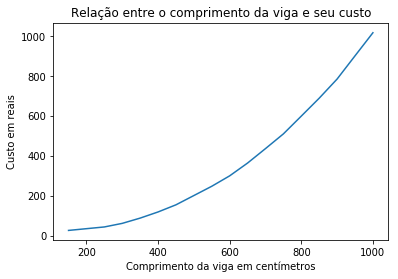

In [30]:
plt.title("Relação entre o comprimento da viga e seu custo")
plt.ylabel("Custo em reais")
plt.xlabel("Comprimento da viga em centímetros")
plt.plot(dados_menores_custos["comprimento"], dados_menores_custos["custo"])
print()

#### Determinação da parábola

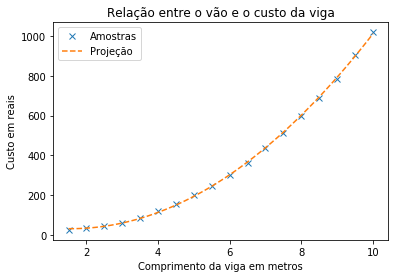

Coeficientes da parábola a + b*x + c*xˆ2 :
a: 13.710532521170544, b: -42.72626046676211, c: 66.00017644207391


In [32]:
x = np.array(dados_menores_custos["comprimento"])/100
y = np.array(dados_menores_custos["custo"])
coeficentes_da_parabola = np.polyfit(x, y, 2)

x_projetado = np.linspace(x[0], x[-1], 100)
y_projetado = np.poly1d(coeficentes_da_parabola)(x_projetado)

plt.title("Relação entre o vão e o custo da viga")
plt.ylabel("Custo em reais")
plt.xlabel("Comprimento da viga em metros")


real, = plt.plot(x, y, 'x', label="Amostras")
projecao, = plt.plot(x_projetado, y_projetado, '--', label="Projeção")
plt.legend()
plt.show()

print("Coeficientes da parábola a + b*x + c*xˆ2 :")
print("a: {}, b: {}, c: {}".format(*coeficentes_da_parabola))


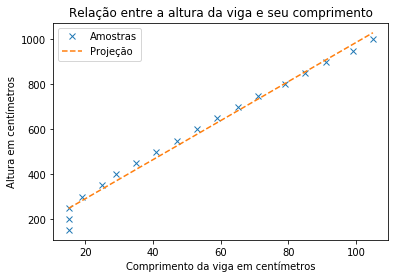

In [40]:
x = np.array(dados_menores_custos["altura"])
y = np.array(dados_menores_custos["comprimento"])
coeficentes_da_parabola = np.polyfit(x, y, 1)

x_projetado = np.linspace(x[0], x[-1], 100)
y_projetado = np.poly1d(coeficentes_da_parabola)(x_projetado)

plt.title("Relação entre a altura da viga e seu comprimento")
plt.ylabel("Altura em centímetros")
plt.xlabel("Comprimento da viga em centímetros")


real, = plt.plot(x, y, 'x', label="Amostras")
projecao, = plt.plot(x_projetado, y_projetado, '--', label="Projeção")
plt.legend()
plt.show()

#print("Coeficientes da parábola a + b*x + c*xˆ2 :")
#print("a: {}, b: {}, c: {}".format(*coeficentes_da_parabola))


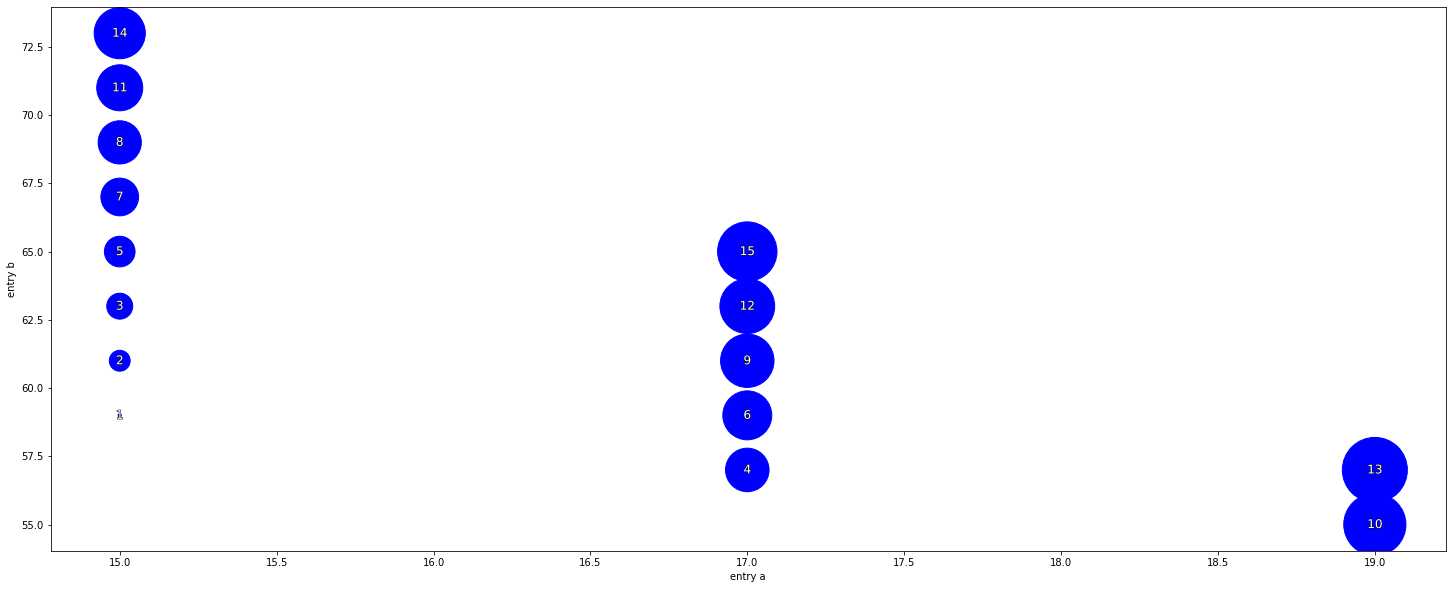

In [29]:
for length in [df["length"].unique()[3]]:
    df_parcial = df[df["length"] == length]
    min_cost = min(df_parcial[(df_parcial["cost"] != -1)]["cost"])
    df_parcial = df_parcial[df_parcial["cost"] >= min_cost]
    data = {'a': df_parcial["width"],
        'b': df_parcial["height"],
        's': 100*(df_parcial["cost"].replace(-1, min_cost)-min_cost+0.1),
        #"s": df_parcial["cost"].replace(-1, min_cost),
        "c": (df_parcial["cost"] == -1).map({True: "r", False: "b"})
       }

    for x, y, i in zip(df_parcial["width"],df_parcial["height"], range(1, len(df_parcial["height"])+1)):
        plt.text(x, y, i, fontsize=12, horizontalalignment='center', verticalalignment='center',
                 color="white", path_effects=[pe.withStroke(linewidth=1, foreground='black')])
    
    plt.scatter('a', 'b', s="s", c="c", data=data)
    
    
    plt.xlabel('entry a')
    plt.ylabel('entry b')
    plt.show()

In [42]:
lowest_cost

,width,height,length,cost,error,Concrete,Longitudinal bar,Transversal bar
100.0,15.0,15.0,100.0,17.056447,,7.95,5.77,3.33
200.0,15.0,27.0,200.0,60.049609,,28.62,22.30,9.13
300.0,15.0,41.0,300.0,135.851519,,65.18,52.66,18.01
400.0,15.0,59.0,400.0,253.526718,,125.07,97.06,31.40
500.0,15.0,77.0,500.0,418.332898,,204.03,163.40,50.90
600.0,15.0,99.0,600.0,646.400865,,314.79,250.93,80.68
700.0,15.0,123.0,700.0,943.328131,,456.29,368.11,118.93
800.0,15.0,151.0,800.0,1330.056170,,640.18,512.67,177.20
900.0,15.0,179.0,900.0,1805.191314,,853.75,699.43,252.01
1000.0,15.0,211.0,1000.0,2390.466405,,1118.19,926.47,345.80


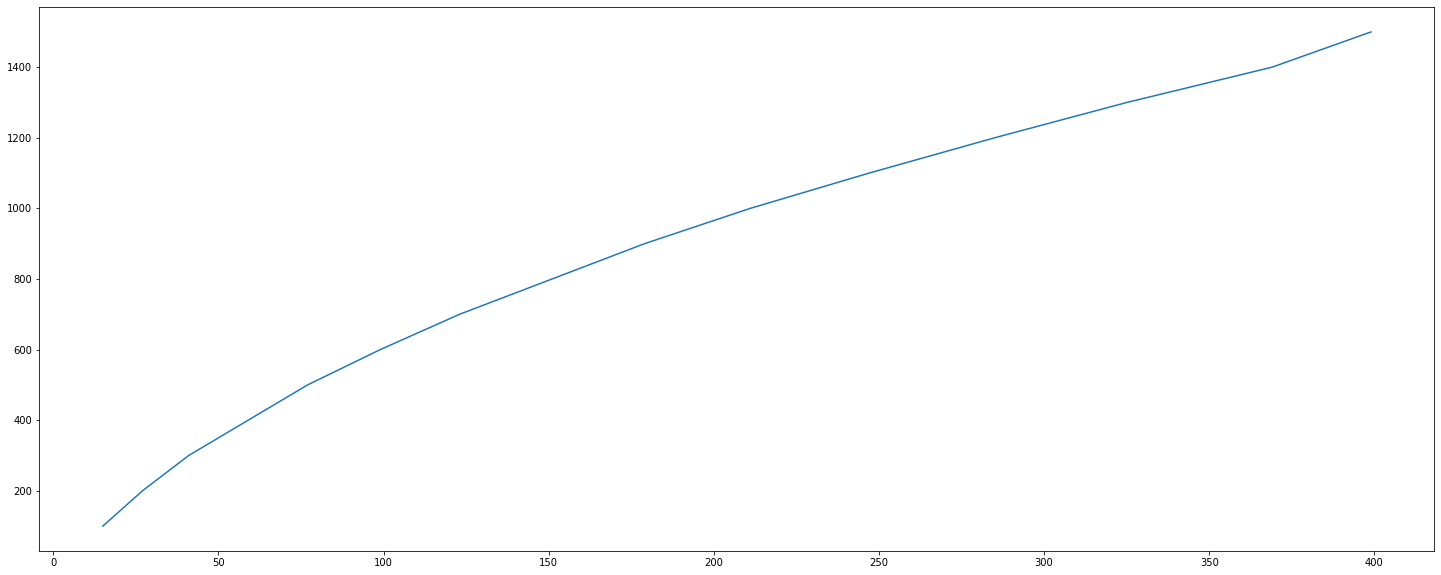

In [43]:
plt.plot(lowest_cost["height"], lowest_cost["length"])

In [44]:
lowest_cost["length"]/lowest_cost["height"]

100.0     6.666667
200.0     7.407407
300.0     7.317073
400.0     6.779661
500.0     6.493506
600.0     6.060606
700.0     5.691057
800.0     5.298013
900.0     5.027933
1000.0    4.739336
1100.0    4.453441
1200.0    4.210526
1300.0    4.000000
1400.0    3.794038
1500.0    3.759398
dtype: float64

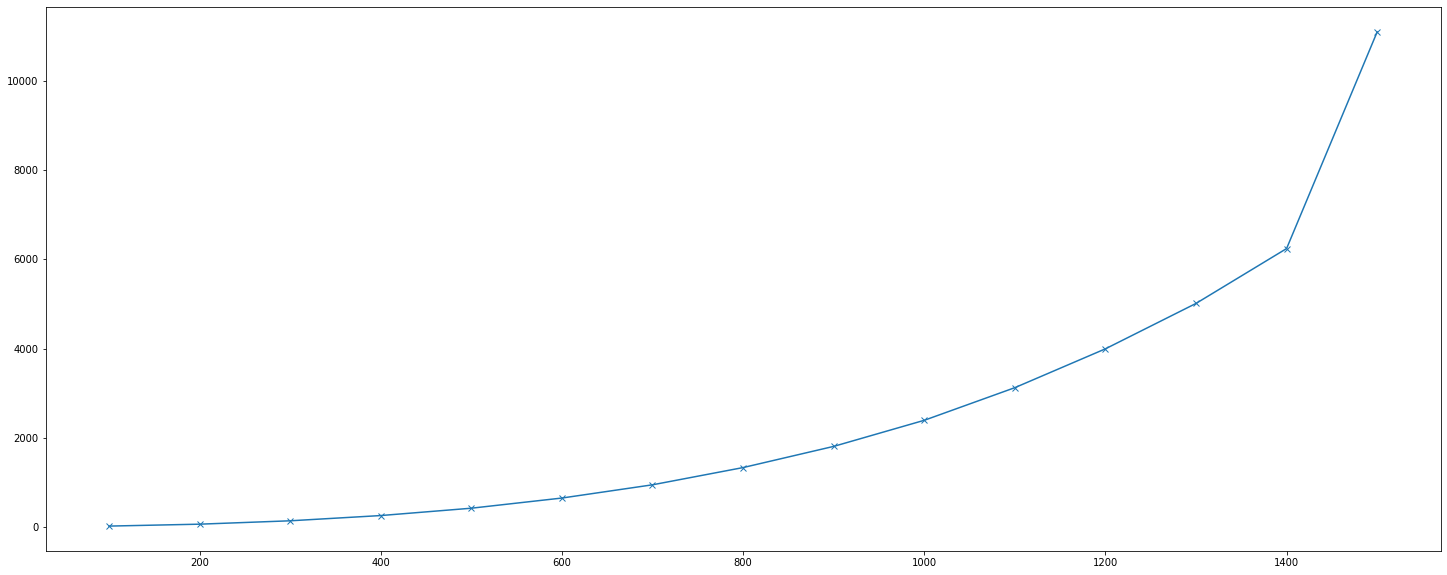

In [48]:
plt.plot(lowest_cost["length"], lowest_cost["cost"], "-x")

In [49]:
lowest_cost["cost"]/lowest_cost["length"]

100.0     0.170564
200.0     0.300248
300.0     0.452838
400.0     0.633817
500.0     0.836666
600.0     1.077335
700.0     1.347612
800.0     1.662570
900.0     2.005768
1000.0    2.390466
1100.0    2.838779
1200.0    3.328333
1300.0    3.855884
1400.0    4.459703
1500.0    7.403043
dtype: float64

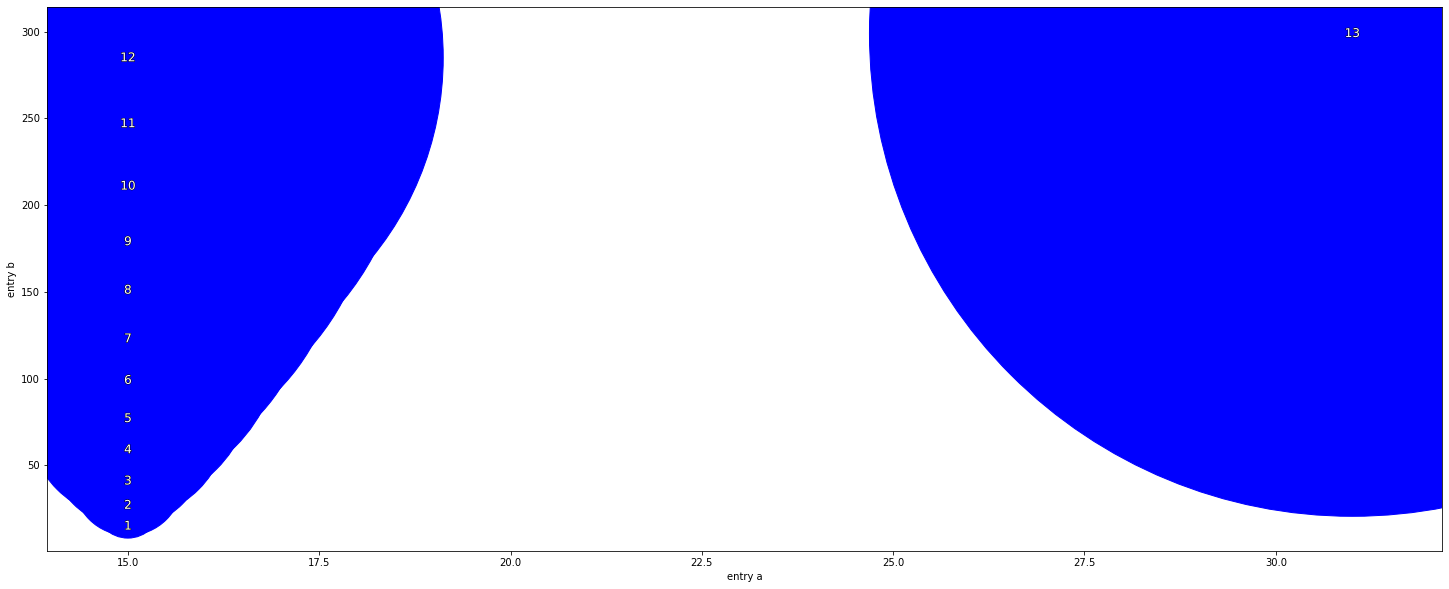

In [37]:
#for length in lowest_cost["length"]:
df_parcial = lowest_cost
min_cost = min(df_parcial[(df_parcial["cost"] != -1)]["cost"])
df_parcial = df_parcial[df_parcial["cost"] >= min_cost]
data = {'a': df_parcial["width"],
    'b': df_parcial["height"],
    's': 100*(df_parcial["cost"].replace(-1, min_cost)-min_cost+0.1),
    #"s": df_parcial["cost"].replace(-1, min_cost),
    "c": (df_parcial["cost"] == -1).map({True: "r", False: "b"})
   }

for x, y, i in zip(df_parcial["width"],df_parcial["height"], range(1, len(df_parcial["height"])+1)):
    plt.text(x, y, i, fontsize=12, horizontalalignment='center', verticalalignment='center',
             color="white", path_effects=[pe.withStroke(linewidth=1, foreground='black')])

plt.scatter('a', 'b', s="s", c="c", data=data)


plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

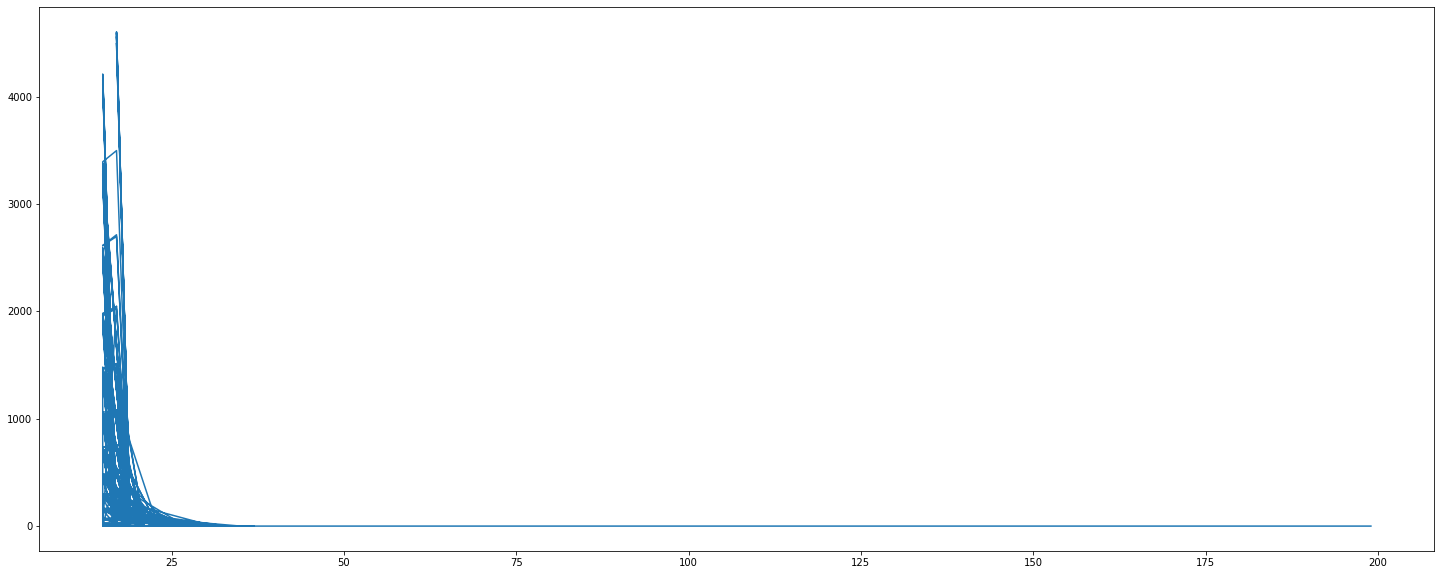

In [167]:
plt.plot(df["width"],df["cost"])
